In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
partition = 60000
X_train, X_test, y_train, y_test = X[:partition], X[partition:], y[:partition], y[partition:]

In [3]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [7]:
is_5_y_train = (y_train == 5)

never_5_classifier = Never5Classifier()
never_5_classifier.fit(X_train, is_5_y_train)

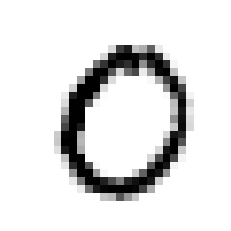

array([[False]])

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = X_test[101]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

never_5_classifier.predict([x])

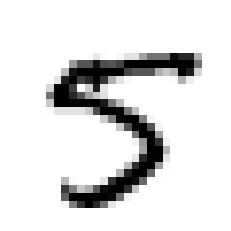

array([[False]])

In [9]:
x = X_test[102]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

never_5_classifier.predict([x])

In [10]:
from sklearn.model_selection import cross_val_score

cross_val_score(never_5_classifier, X_train, is_5_y_train, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])